In [1]:
import numpy as np                        # Math
import scipy.stats                        # Statistics
from matplotlib import pyplot as plt      # Plots

In [2]:
import ssl
import urllib.request

# Disabilita la verifica del certificato SSL
ssl._create_default_https_context = ssl._create_unverified_context

# Scarica il file
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

('stars.csv', <http.client.HTTPMessage at 0x134cac790>)

In [3]:
import pandas as pd
df_stars = pd.read_csv("stars.csv")

In [4]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)

[0 1 2 3 4 5]


240
240
240
240
240


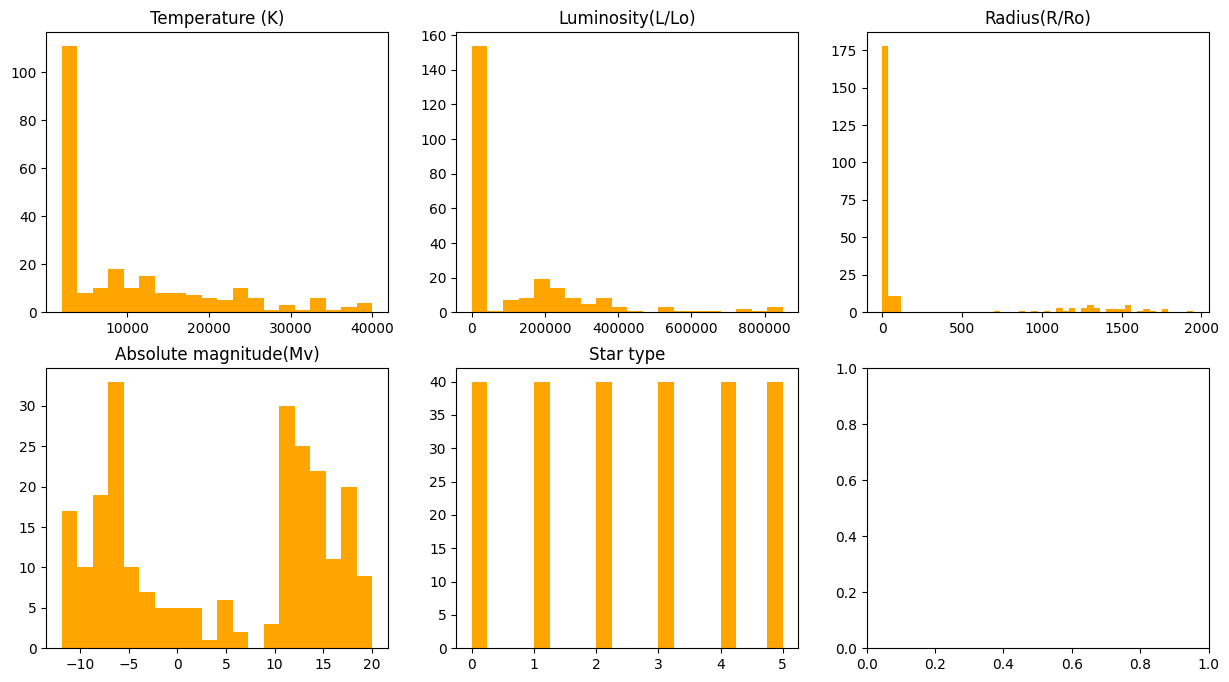

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

axs[0,0].hist(df_stars['Temperature (K)'], 20, color = 'orange')
axs[0,0].set_title('Temperature (K)')
print(len(df_stars['Temperature (K)']))

axs[0,1].hist(df_stars['Luminosity(L/Lo)'], 20, color = 'orange')
axs[0,1].set_title('Luminosity(L/Lo)')
print(len(df_stars['Luminosity(L/Lo)']))

axs[0,2].hist(df_stars['Radius(R/Ro)'], 50, color = 'orange')
axs[0,2].set_title('Radius(R/Ro)')
print(len(df_stars['Radius(R/Ro)']))

axs[1,0].hist(df_stars['Absolute magnitude(Mv)'], 20, color = 'orange')
axs[1,0].set_title('Absolute magnitude(Mv)')
print(len(df_stars['Absolute magnitude(Mv)']))

axs[1,1].hist(labels, 20, color = 'orange')
axs[1,1].set_title('Star type')
print(len(df_stars['Star type']))

plt.show()

Non sembrano esserci valori mancanti o NaNs

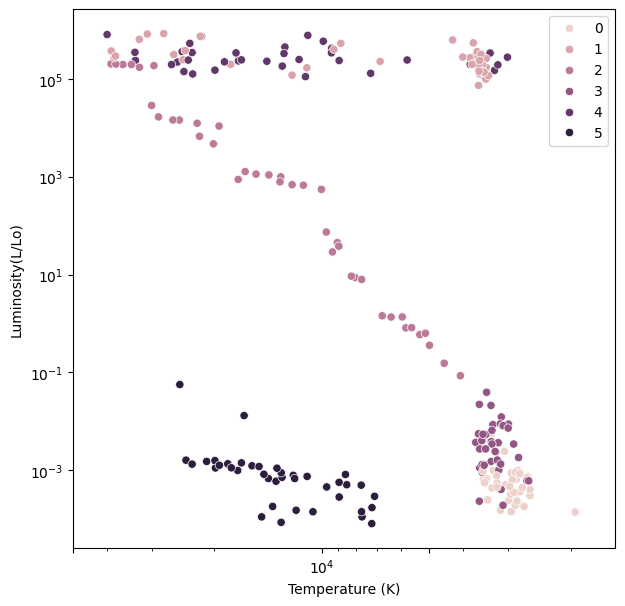

In [13]:
import seaborn as sns

fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

In [56]:
X = np.array([df_stars['Temperature (K)'], df_stars['Luminosity(L/Lo)'], df_stars['Radius(R/Ro)'], df_stars['Absolute magnitude(Mv)'], labels])
#print(X)

In [57]:
from sklearn.decomposition import PCA
#from sklearn.decomposition import RandomizedPCA

from astroML.datasets import sdss_corrected_spectra
from astroML.utils import pickle_results

In [58]:
pca = PCA(n_components=2) # n_components can be optionally set
pca.fit(X) 

eigenvalues = pca.transform(X) 
mean = pca.mean_
eigenvectors = pca.components_ 

# Reconstruction of object1
# Xreconstruct[0] = mean + eigenvectors*eigenvalues[0]

print(eigenvalues.shape)
print(eigenvectors.shape)

(5, 2)
(2, 240)


In [59]:
evals = pca.explained_variance_ratio_ 
print('Expained fractional variance of data encapsulated in the eigenvalues: ' + str(evals))

Expained fractional variance of data encapsulated in the eigenvalues: [0.99716083 0.00283534]


(5, 240)


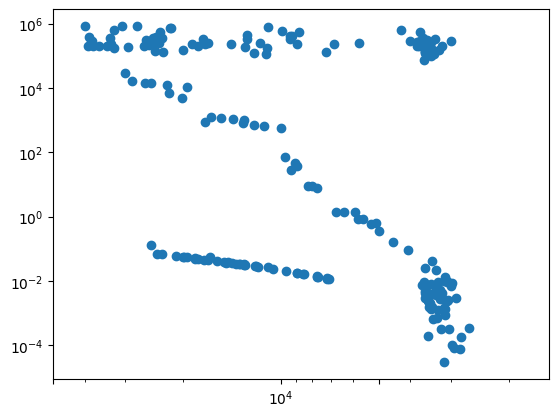

In [62]:
Xreconstruct = mean + np.dot(eigenvalues, eigenvectors) 
print(np.shape(Xreconstruct))

#evals = pca.explained_variance_ratio_ 
#print('Expained fractional variance of data encapsulated in the eigenvalues: ' + str(evals))

plt.scatter(Xreconstruct[0,:], Xreconstruct[1,:])
plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()
plt.show()

Prepare the data:

In [67]:
from sklearn.preprocessing import StandardScaler

#print(X.T)
K = X.T
print(np.shape(K))

scaler = StandardScaler()
scaler.fit(K)
#print(scaler.mean_)
K1 = scaler.transform(K)

X1 = K1.T

print(X1)
#print(np.mean(X1[0,:]), np.mean(X1[1,:]))

(240, 5)
[[-0.7793821  -0.78210961 -0.82847728 ... -0.17502879 -0.13243767
   2.87275403]
 [-0.59862356 -0.59862357 -0.59862357 ...  2.40315735  1.66287782
   1.04834522]
 [-0.45920992 -0.45924053 -0.45934168 ...  2.29779992  1.69517694
   2.99536993]
 [ 1.11674535  1.16241376  1.36221308 ... -1.43783157 -1.48540283
  -1.15906395]
 [-1.46385011 -1.46385011 -1.46385011 ... -0.87831007 -0.87831007
  -0.87831007]]


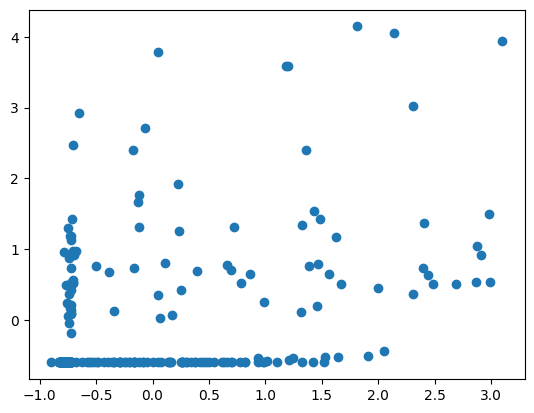

In [68]:
plt.scatter(X1[0,:], X1[1,:])

#plt.xscale('log')
#plt.yscale('log')
#plt.xticks([5000, 10000, 50000])
#plt.xlim(5e4, 1.5e3)
plt.show()

(5, 240)
(5, 2)
(2, 240)
(5, 240)
Expained fractional variance of data encapsulated in the eigenvalues: [0.5124134  0.27663362]


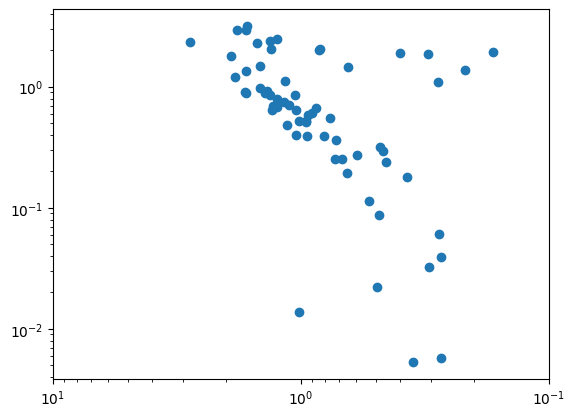

In [71]:
pca = PCA(n_components=2) # n_components can be optionally set
pca.fit(X1) 

eigenvalues = pca.transform(X1) 
mean = pca.mean_
eigenvectors = pca.components_ 

# Reconstruction of object1
print(np.shape(X))
print(eigenvalues.shape)
print(eigenvectors.shape)

Xreconstruct = mean + np.dot(eigenvalues, eigenvectors) 
print(np.shape(Xreconstruct))

evals = pca.explained_variance_ratio_ 
print('Expained fractional variance of data encapsulated in the eigenvalues: ' + str(evals))

plt.scatter(Xreconstruct[0,:], Xreconstruct[1,:])
plt.xscale('log')
plt.yscale('log')
#plt.xticks([5000, 10000, 50000])
plt.xlim(1e1, 1e-1)
plt.show()
plt.show()